# sentiment analysis using machine learning algorithms

In [37]:
import pandas as pd
import project1 as p1
import utils
import numpy as np

In [38]:
df = pd.read_csv('reviews_submit.tsv', sep='\t', encoding='latin-1')


In [39]:
train_data = utils.load_data('reviews_train.tsv')
val_data = utils.load_data('reviews_val.tsv')
test_data = utils.load_data('reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = p1.bag_of_words(train_texts)

train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)

In [40]:
print(len(train_data))
print(train_data[1])

4000
{'sentiment': -1, 'text': 'I had high hopes for this, but it was bad.  Really bad.  The whole pan of cupcakes made from this had to be thrown out.  Very gritty and dense.'}


In [41]:
print(dictionary)

{'chips': 0, 'okay': 1, 'near': 2, 'flavorful': 3, 'regular': 4, 'blue': 5, '.': 6, 'nice': 7, 'size': 8, 'bag': 9, 'family': 10, 'high': 11, 'hopes': 12, ',': 13, 'bad': 14, 'really': 15, 'whole': 16, 'pan': 17, 'cupcakes': 18, 'made': 19, 'thrown': 20, 'gritty': 21, 'dense': 22, 'guess': 23, "'": 24, 'one': 25, 'since': 26, 'nothing': 27, 'description': 28, 'many': 29, 'cans': 30, 'get': 31, 'intelligent': 32, '"': 33, 'oatmeal': 34, 'squares': 35, 'largest': 36, 'print': 37, 'fit': 38, 'front': 39, 'box': 40, 'read': 41, 'ingredients': 42, 'second': 43, 'ingredient': 44, 'wheat': 45, 'flour': 46, 'rightfully': 47, 'called': 48, 'crunchy': 49, 'oat': 50, 'cereal': 51, '<': 52, 'br': 53, '/': 54, '>': 55, 'wonder': 56, 'quaker': 57, 'noted': 58, 'somewhat': 59, 'deceptive': 60, 'disclose': 61, 'upfront': 62, 'completely': 63, 'go': 64, 'make': 65, 'claims': 66, 'cholesterol': 67, 'lowering': 68, 'oats': 69, 'cares': 70, 'tastes': 71, 'says': 72, 'enjoyed': 73, 'flavor': 74, 'subtle': 

In [42]:
train_bow_features

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

theta for Perceptron is 3.9173999999999918, 4.164000000000001
theta_0 for Perceptron is -8.0


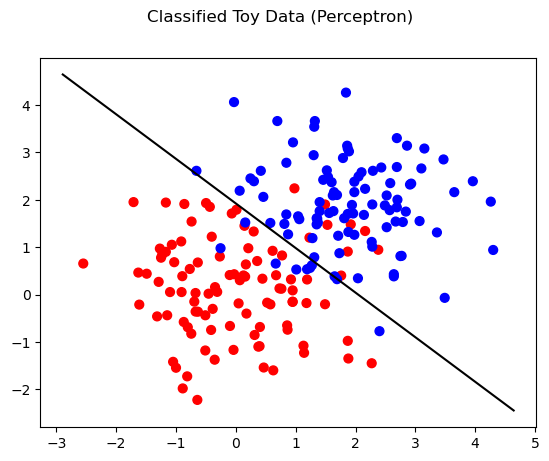

theta for Average Perceptron is 3.47826049999999, 3.611060999999974
theta_0 for Average Perceptron is -6.373


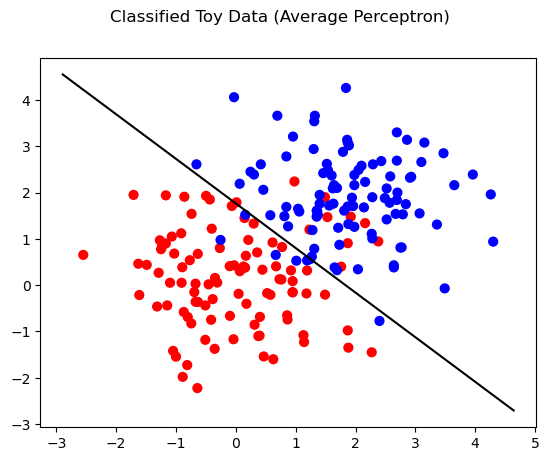

theta for Pegasos is 0.7346463119064065, 0.6300224592973831
theta_0 for Pegasos is -1.2195071848898564


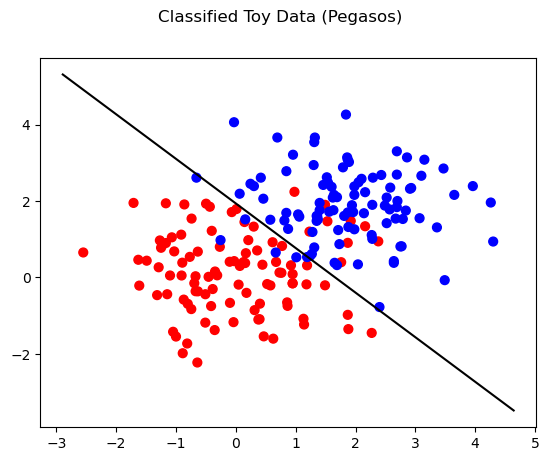

In [43]:
toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')

T = 10
L = 0.2

thetas_perceptron = p1.perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = p1.average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = p1.pegasos(toy_features, toy_labels, T, L)

def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)


In [44]:
td = pd.read_csv('toy_data.tsv', sep='\t', encoding='latin-1')
td.head().T

,0,1,2,3,4
-1,-1.000,-1.000,-1.000,-1.000,-1.000
1.7600,0.979,1.870,0.950,-0.103,0.144
0.4000,2.240,-0.977,-0.151,0.411,1.450


In [45]:
T = 10
L = 0.01
pct_train_accuracy, pct_val_accuracy = \
        p1.classifier_accuracy(p1.perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:35} {:.4f}".format("Training accuracy for perceptron:", pct_train_accuracy))
print("{:35} {:.4f}".format("Validation accuracy for perceptron:", pct_val_accuracy))

avg_pct_train_accuracy, avg_pct_val_accuracy = \
        p1.classifier_accuracy(p1.average_perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:43} {:.4f}".format("Training accuracy for average perceptron:", avg_pct_train_accuracy))
print("{:43} {:.4f}".format("Validation accuracy for average perceptron:", avg_pct_val_accuracy))

avg_peg_train_accuracy, avg_peg_val_accuracy = \
        p1.classifier_accuracy(p1.pegasos, train_bow_features,val_bow_features,train_labels,val_labels,T=T,L=L)
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))


Training accuracy for perceptron:   0.9832
Validation accuracy for perceptron: 0.7600
Training accuracy for average perceptron:   0.9868
Validation accuracy for average perceptron: 0.7760
Training accuracy for Pegasos:                     0.9123
Validation accuracy for Pegasos:                   0.7860


perceptron valid: [(1, 0.722), (5, 0.762), (10, 0.76), (15, 0.762), (25, 0.748), (50, 0.774)]
best = 0.7740, T=50.0000
avg perceptron valid: [(1, 0.78), (5, 0.778), (10, 0.776), (15, 0.778), (25, 0.782), (50, 0.776)]
best = 0.7820, T=25.0000
Pegasos valid: tune T [(1, 0.748), (5, 0.78), (10, 0.786), (15, 0.786), (25, 0.788), (50, 0.788)]
best = 0.7880, T=25.0000
Pegasos valid: tune L [(0.001, 0.78), (0.01, 0.788), (0.1, 0.756), (1, 0.53), (10, 0.518)]
best = 0.7880, L=0.0100


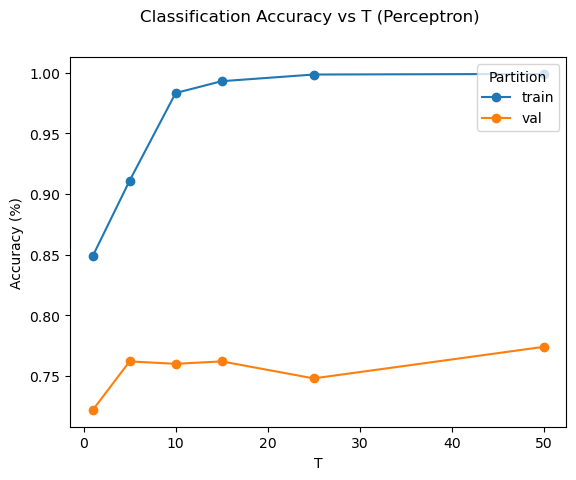

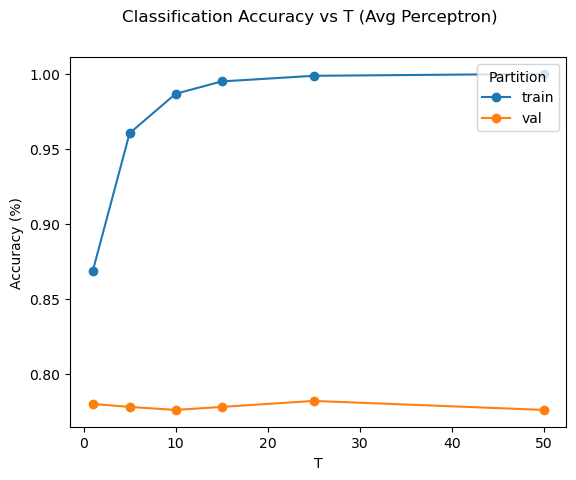

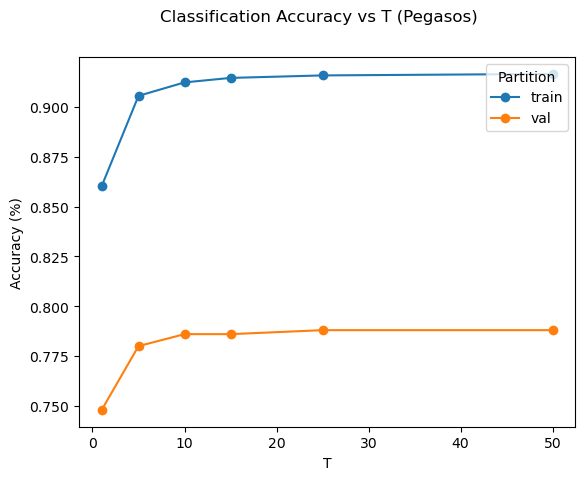

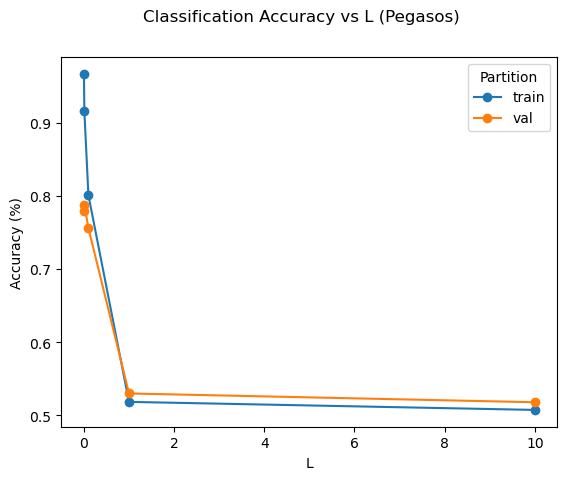

In [46]:
data = (train_bow_features, train_labels, val_bow_features, val_labels)

# # values of T and lambda to try
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]

pct_tune_results = utils.tune_perceptron(Ts, *data)
print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))

avg_pct_tune_results = utils.tune_avg_perceptron(Ts, *data)
print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))

# # fix values for L and T while tuning Pegasos T and L, respective
fix_L = 0.01
peg_tune_results_T = utils.tune_pegasos_T(fix_L, Ts, *data)
print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))

fix_T = Ts[np.argmax(peg_tune_results_T[1])]
peg_tune_results_L = utils.tune_pegasos_L(fix_T, Ls, *data)
print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))

utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)
utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)
utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)
utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)

In [47]:
# Choose the best method based on validation accuracy (e.g., Pegasos)
best_method = p1.pegasos  # Replace with the actual best method (Perceptron, Average Perceptron, or Pegasos)

# Use the optimal hyperparameters
best_T = 25  # Replace with the actual best T value
best_L = 0.0100  # Replace with the actual best L value (only for Pegasos)

# Apply the best method with optimal hyperparameters to the test dataset
if best_method == p1.perceptron:
    # For Perceptron
    test_accuracy = p1.classifier_accuracy(best_method, train_bow_features, test_bow_features, train_labels, test_labels, T=best_T)
elif best_method == p1.average_perceptron:
    # For Average Perceptron
    test_accuracy = p1.classifier_accuracy(best_method, train_bow_features, test_bow_features, train_labels, test_labels, T=best_T)
elif best_method == p1.pegasos:
    # For Pegasos
    test_accuracy = p1.classifier_accuracy(best_method, train_bow_features, test_bow_features, train_labels, test_labels, T=best_T, L=best_L)

# Print the test accuracy
print("Test accuracy for the best method:", test_accuracy)

Test accuracy for the best method: (0.91575, 0.808)


In [48]:
# Train the Pegasos model with optimal hyperparameters
best_method = p1.pegasos
best_T = 25
best_L = 0.0100

# Train the Pegasos model using the optimal hyperparameters
best_theta, _ = best_method(train_bow_features, train_labels, T=best_T, L=best_L)

# Extract the most explanatory word features
wordlist = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)

# Print the most explanatory word features (top 10, for example)
print("Most Explanatory Word Features")
print(sorted_word_features[:10])

# Assign the best_theta with the bias term removed
best_theta = best_theta[1:]  # Exclude the bias term (theta_0)

# Print or use the best_theta as needed (excluding the bias term)
print("Weights (excluding bias) learned by the best method (Pegasos):")
print(best_theta)

Most Explanatory Word Features
['delicious', 'great', 'loves', '!', 'best', 'perfect', 'excellent', 'wonderful', 'favorite', 'tasty']
Weights (excluding bias) learned by the best method (Pegasos):
[-0.23488786 -0.02878907  0.00686373 ...  0.02453202  0.02453202
  0.02453202]
